
Create an “Academic performance” dataset of students and perform the following operations
using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values
and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

In [23]:
data=pd.read_csv("StudentsPerformance.csv")

In [24]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [25]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [ ]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Outliers Detection And Removal

<Axes: xlabel='math score'>

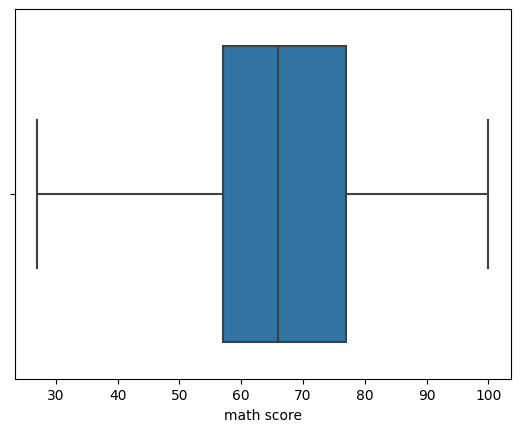

In [ ]:
sns.boxplot(x=data['math score'])

In [ ]:
#2 Detection of outliers

q1 = np.percentile(data['math score'], 25, interpolation='midpoint')
q3 = np.percentile(data['math score'], 75, interpolation='midpoint')
iqr = q3-q1
print("Old shape: ",data.shape)

upper= q3+(1.5*iqr)
lower= q1-(1.5*iqr)
print("upper bound: ",upper)
print("upper bound: ",lower)

data=data[(data['math score']>=lower) & (data['math score']<=upper)]
print("New Shape: ",data.shape)

Old shape:  (1000, 8)
upper bound:  107.0
upper bound:  27.0
New Shape:  (992, 8)


<ipython-input-17-43ad8898398a>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(data['math score'], 25, interpolation='midpoint')
<ipython-input-17-43ad8898398a>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 = np.percentile(data['math score'], 75, interpolation='midpoint')


<Axes: xlabel='math score'>

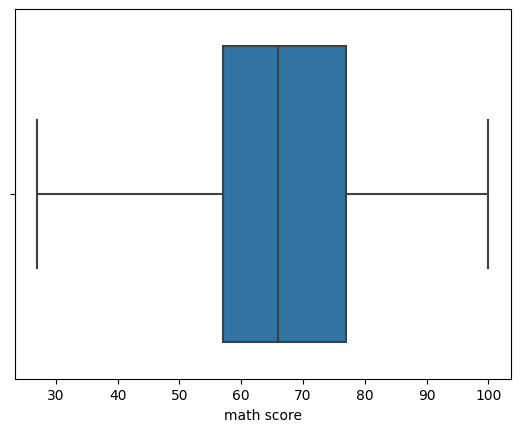

In [ ]:
sns.boxplot(x=data['math score'])

<Axes: xlabel='reading score'>

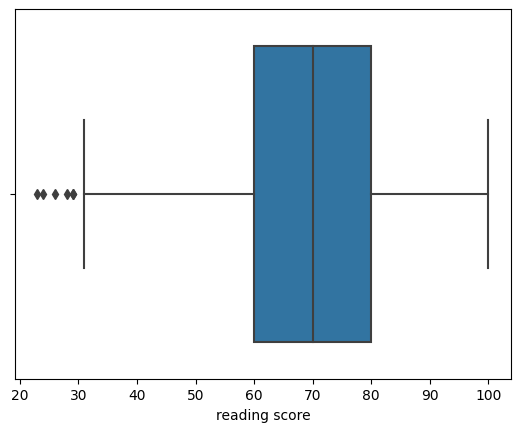

In [ ]:
sns.boxplot(x=data['reading score'])

In [28]:
#2 Detection of outliers-  reading score

q1 = np.percentile(data['reading score'], 25, interpolation='midpoint')
q3 = np.percentile(data['reading score'], 75, interpolation='midpoint')
iqr = q3-q1
print("Old shape: ",data.shape)

upper= q3+(1.5*iqr)
lower= q1-(1.5*iqr)
print("upper bound: ",upper)
print("lower bound: ",lower)

# data=data['Car'].fillna(data['Car'].mean,inplace=True)
data=data[(data['reading score']>=lower) & (data['reading score']<=upper)]
print("New Shape: ",data.shape)

Old shape:  (994, 8)
upper bound:  108.75
lower bound:  30.75
New Shape:  (992, 8)


<ipython-input-28-3ae944324145>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(data['reading score'], 25, interpolation='midpoint')
<ipython-input-28-3ae944324145>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 = np.percentile(data['reading score'], 75, interpolation='midpoint')


<Axes: xlabel='reading score'>

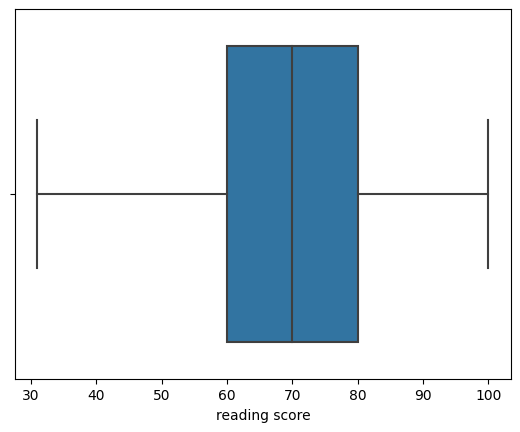

In [29]:
sns.boxplot(x=data['reading score'])

# Data Transformation

In [50]:
df=pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [47]:
# Data transformation
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

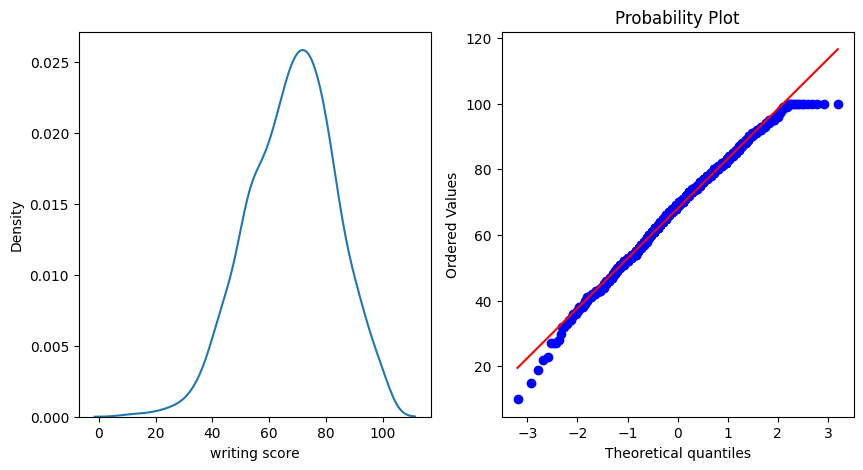

In [48]:
normality(df,'writing score')

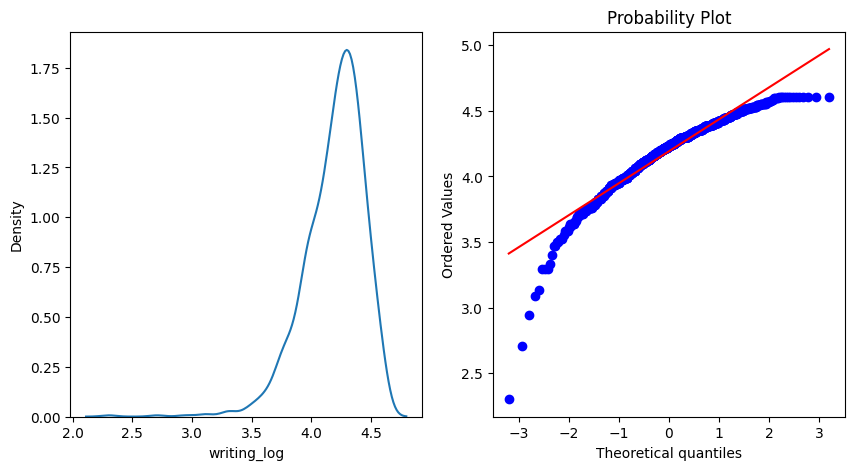

In [49]:
#Logarithmic Transformation
df['writing_log']=np.log(df['writing score'])
normality(df,'writing_log')

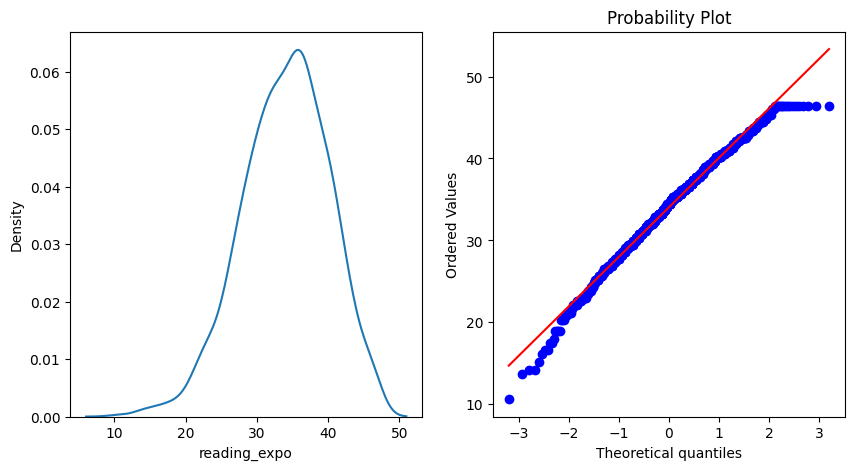

In [51]:
#Exponential Transformation
df['reading_expo']=df['reading score']**(1/1.2)
normality(df,'reading_expo')

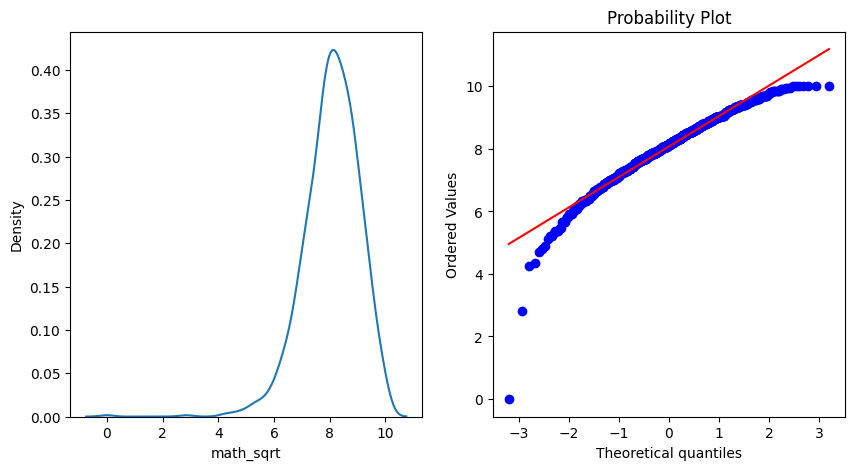

In [52]:
#SquareRoot Transformation
df['math_sqrt']=np.sqrt(df['math score'])
normality(df,'math_sqrt')

In [53]:
#applying transformations on the data columns
df['math score'].skew()

-0.27893514909431694